In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
np.random.seed(0)

In [2]:
class Canvas:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.area = width * height
        
class Sml_rec:
    def __init__(self, height, width, bound, shape = None):
        
        self.bound = bound
        self.shape = shape
        self.length_width = len(bin(bound.width))-2
        code_width = '{0:0rb}'.replace('r',f'{self.length_width}')

        self.width = width
        self.height = height
        self.area = width * height
        self.y = np.random.randint(0, bound.width - self.width + 1)

        self.dna = code_width.format(self.y)

        
    def get_dna(self, dna):
        self.dna = dna
        self.y = int(dna,2)

In [3]:
class Body:
    def __init__(self, organ, canvas):
        self.organ = organ
        self.bound = canvas
        self.body = sorted([Sml_rec(o[0], o[1], canvas, o[2]) for o in organ], key = lambda x: x.area, reverse=True)
        self.dna = ''.join([b.dna for b in self.body])
        self.total_area = sum([b.area for b in self.body])
        self.dna_length = len(self.dna)
        self.num_of_organ = len(self.body)
        self.dna_length_per_organ = self.dna_length // self.num_of_organ
        
    def xover(self, other):
        
        point = random.randint(0, self.dna_length)
        chl1_body = Body(self.organ, self.bound)
        chl2_body = Body(self.organ, self.bound)
        
        chl1_body.dna = self.dna[:point] + other.dna[point:]
        chl2_body.dna = other.dna[:point] + self.dna[point:]
        
        chl1_body.tranform_dna()
        chl2_body.tranform_dna()
        

        return chl1_body, chl2_body
    
    def mutate(self):
        position = np.random.randint(0, self.dna_length)
        
        if self.dna[position] == '1':
            self.dna = self.dna[:position] + '1' + self.dna[position+1:]
        else:
            self.dna = self.dna[:position] + '0' + self.dna[position+1:]
        
        self.tranform_dna()
            
    def tranform_dna(self):
        dna = [self.dna[i*self.dna_length_per_organ:i*self.dna_length_per_organ + self.dna_length_per_organ] for i in range(len(self.body)) ]
        
        for i in range(len(dna)):
            self.body[i].get_dna(dna[i])
            
    def score(self,show=False):
        a = np.zeros(self.bound.area).reshape(self.bound.width, self.bound.height)
        for b in self.body:
            for i in range(self.bound.height - b.height + 1):
                box = np.zeros(self.bound.area).reshape(self.bound.width, self.bound.height)
                box[i : i + b.height, b.y : b.y + b.width] = 1
                if np.any(a+box > 1):
                    pass
                else:
                    p = i
                    
            a[p : p + b.height, b.y : b.y + b.width] = 1
            
        bound = np.where(a>0)
        used_area = (max(bound[0]) - min(bound[0])) * (max(bound[1]) - min(bound[1]))
        
        if show:
            print(used_area)
            plt.imshow(a)
            plt.show()
            
        return [used_area]
    
    def fight(self, other):
        
        scores = np.array([self.score(), other.score()])
        if all(scores[1] >= scores[0]) and any(scores[1] > scores[0]):
            return self
        else:
            return other

In [4]:
n_iter = 10
n_sel = 200
n_xover = 300
p_mutate = 0.3
n_pop = n_sel + n_xover

#Init population
max_score = [0,0]
A1 = np.ones(15*15).reshape(15,15)
A1[4:11,4:11] = 0

A2 = np.ones(7*7).reshape(7,7)
A2[2:5,2:5] = 0

bound = Canvas(40,40)
organ = [[15,15, A1],[7,7, A2],[15,5,None],[15,5,None],[5,5, None], [3,3, None],[15,5,None],[7,7, A2],[15,15, A1],[15,5,None]]
pop_list = [Body(organ, bound) for _ in range(n_pop)]

for _ in tqdm(range(n_iter)):
    #Evaluate fitness
    generation = sorted(pop_list, key=lambda x: x.score()[-1], reverse=False)
    
    #Select parent
    new_gen = generation[:n_sel]
    
    #Cross over
    for _ in range(n_sel, n_pop, 2):
        
        index1,index2,index3,index4 = [random.randint(0, n_sel-1) for _ in range(4)]

        parent1 = new_gen[index1].fight(new_gen[index2])
        parent2 = new_gen[index3].fight(new_gen[index4])
        
        offsprint1, offsprint2 = parent1.xover(parent2)
        
        #Permutation    
        if random.uniform(0,1) < p_mutate:
            offsprint1.mutate()
            offsprint2.mutate()
        new_gen.append(offsprint1)
        new_gen.append(offsprint2)
        
    #New generation
    pop_list = new_gen

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.94s/it]


individual 0
504


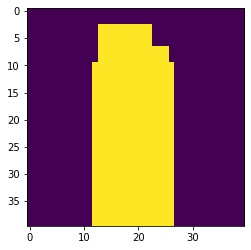

--------------------------------------------------
individual 1
504


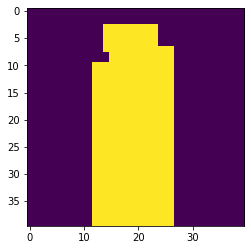

--------------------------------------------------
individual 2
504


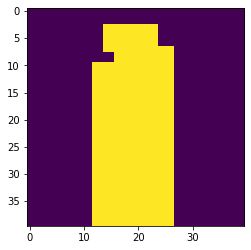

--------------------------------------------------
individual 3
504


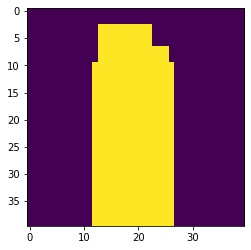

--------------------------------------------------
individual 4
540


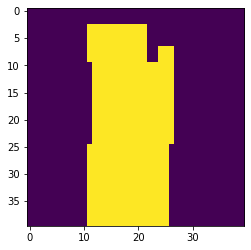

--------------------------------------------------
individual 5
540


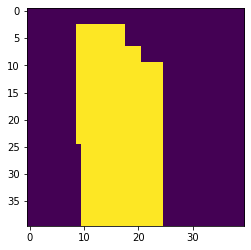

--------------------------------------------------
individual 6
540


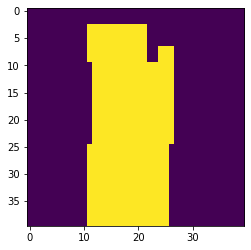

--------------------------------------------------
individual 7
540


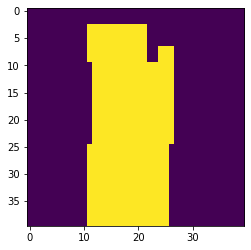

--------------------------------------------------
individual 8
540


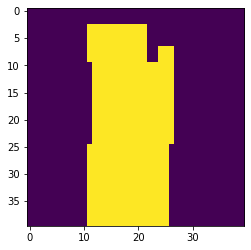

--------------------------------------------------
individual 9
540


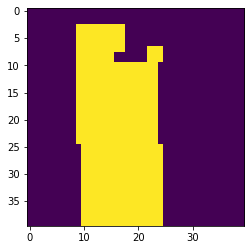

--------------------------------------------------
individual 10
540


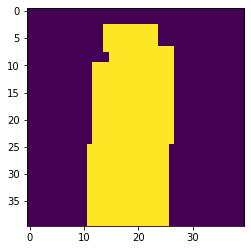

--------------------------------------------------
individual 11
540


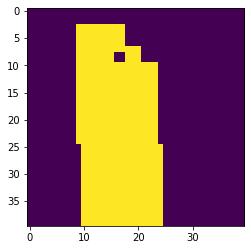

--------------------------------------------------
individual 12
540


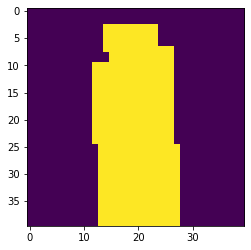

--------------------------------------------------
individual 13
540


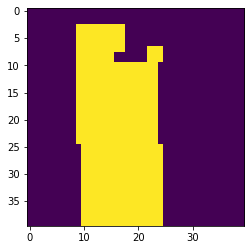

--------------------------------------------------
individual 14
540


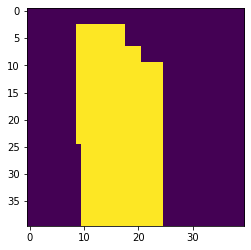

--------------------------------------------------
individual 15
540


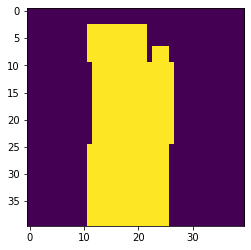

--------------------------------------------------
individual 16
540


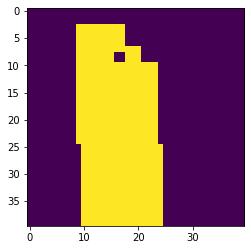

--------------------------------------------------
individual 17
540


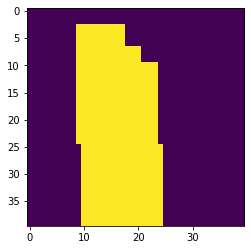

--------------------------------------------------
individual 18
540


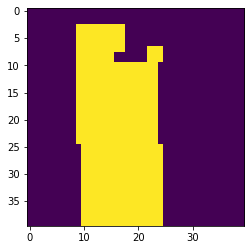

--------------------------------------------------
individual 19
540


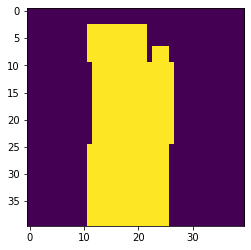

--------------------------------------------------


In [7]:
for i in range(20):
    print(f'individual {i}')
    pop_list[i].score(show=True)
    print(50*'-')